<a href="https://colab.research.google.com/github/XiekangZhang/everything_about_python/blob/main/hands_on_ML/Hands_On_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[source code](https://github.com/ageron/handson-ml3)

# Part 1: The Fundamentals of Machine Learning

## Chapter 1: The Machine Learning Landscape

- Digging into large amounts of data to discover hidden patterns is called _data mining_, and machine learning excels at it.

- Type of machine learning

  - Supervised vs. Unsupervised learning
    - Semi-supervised learning (group -> classification)
    - Self-supervised learning (pretrain -> finetune/transfer learning)

  - Reinforcement learning

  - Online vs. Batch learning

    - batch learning --> training using all the available data, also called offline learning --> retrain the model often to avoid _data drift_ issue.
    - online learning --> train the system incrementally by feeding it data instances sequentially, either individually or in small groups called *mini-batches*. --> Use Cases: system changing extremely rapidly, limited computing resources, and training models on huge datasets that cannot fit in one machine's main memory

  - Instance-based vs. model-based learning
    
    - Instanec-based learning: the system learns the examples by heart, then generalizes to new cases by using a similarity measure to compare them to the learned examples.
    - Model-based learning: use model for prediction

- Main Challenges of Machine Learning - bad model & bad data

  - Insufficient Quantity of Training Data
  - Nonrepresentative Training Data -- sampling bias
  - Poor-Quality Data

    - If some instances are clearly outliers, it may help to simply discard them or try to fix the errors manually
    - If some instances are missing a few features, you must decide whether you want to ignore this attribute altogether, ignore these instances, fill in the missing values, or train one model with the feature and one model without it.
    - Irrelevant Features
      
      - _Feature engineering_: feature selection, feature extraction, feature creation
      - Overfitting: _regularization_ to reduce the risk of overfitting
      - Underfitting: model too simple

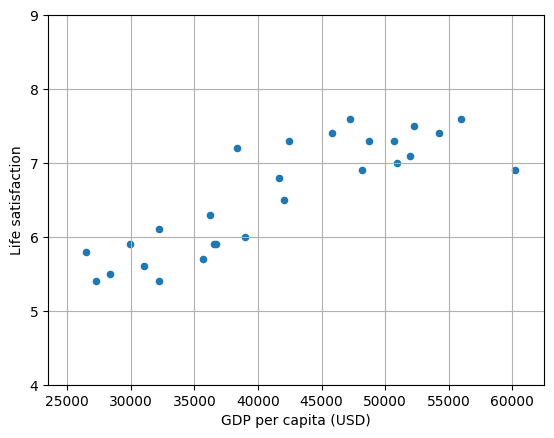

[[6.30165767]]
[[6.33333333]]


In [25]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

# Download and prepare the data
data_root = "https://github.com/ageron/data/raw/main/"
lifesat = pd.read_csv(data_root + "lifesat/lifesat.csv")
X = lifesat[["GDP per capita (USD)"]].values
y = lifesat[["Life satisfaction"]].values

# Visualize the data
lifesat.plot(kind='scatter', grid=True,
             x="GDP per capita (USD)", y="Life satisfaction")
plt.axis([23_500, 62_500, 4, 9])
plt.show()

# Select a linear model
model = LinearRegression()

# Train the model
model.fit(X, y)

# Make a prediction for Cyprus
X_new = [[37_655.2]]  # Cyprus' GDP per capita in 2020
print(model.predict(X_new)) # output: [[6.30165767]]


### from LinearRegression() to KNeighborsRegressor
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors=3)
model.fit(X, y)
print(model.predict([[37_655.2]]))

## Chapter 2: End-to-End Machine Learning Project

- Frame the Problem and Look at the big picture

  - Define the business objective
  - What the current solution looks like (if any)?
  - Define the type of model, and its task. --> // todo: check MapReduce
  - Select a Performance Measure
    - RMSE: L2 norm
    - MAE: L1 norm
    - The higher the norm index, the more it focuses on large values and neglects small ones. This is why the RMSE is more sensitive to outliers than the MAE.
  - Check the Assumptions

- Get the data

  - fetch and load the data
  - Take a Quick Look at the Data Structure by using _df.info()_, _df.header()_, _df.describe()_, _df.hist()_
  - Create a Test Set --> _data snooping_ and _stratified sampling_

- Explore and visualize the data to gain insights
  
  - EDA: Explorative Data Analysis
    - Visualizing (Geographical) Data
    - Look for Correlations
    - Experiment with Attribute Combinations --> _feature engineering_

- Prepare the data for machine learning algorithms --> copy the data instead of manipulating itself

  - Clean the Data
    
    - Handle missing values
      
      - Get rid of the corresponding districts
      - Get rid of the whole attribute
      - Set the missing values to some value (zero, the mean, the median, etc.). This is called _imputation_.

  - Handling Text and Categorical Attributes
  - Feature Scaling and Transformation
  - Custom Transformers
  - Transformation Pipelines

- Select a model and train it
- Fine-tune your model
- Present your solution
- Launch, monitor, and maintain your system

In [26]:
# fetch and load the data
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

def load_housing_data():
  tarball_path = Path("datasets/housing.tgz")
  if not tarball_path.is_file():
    Path("datasets").mkdir(parents=True, exist_ok=True)
    url = "https://github.com/ageron/data/raw/main/housing.tgz"
    urllib.request.urlretrieve(url, tarball_path)
    with tarfile.open(tarball_path) as housing_tarball:
      housing_tarball.extractall(path="datasets")
  return pd.read_csv(Path("datasets/housing/housing.csv"))

housing = load_housing_data()

In [27]:
print(f"------head------\n{housing.head()}\n")
print("----------------info-----------------")
print(f"{housing.info()}")
print("-------------------------------------")
print(housing["ocean_proximity"].value_counts())
print("-------------------------------------")
print(housing.describe())

------head------
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  

----------------info-----------------
<class 'pandas.core

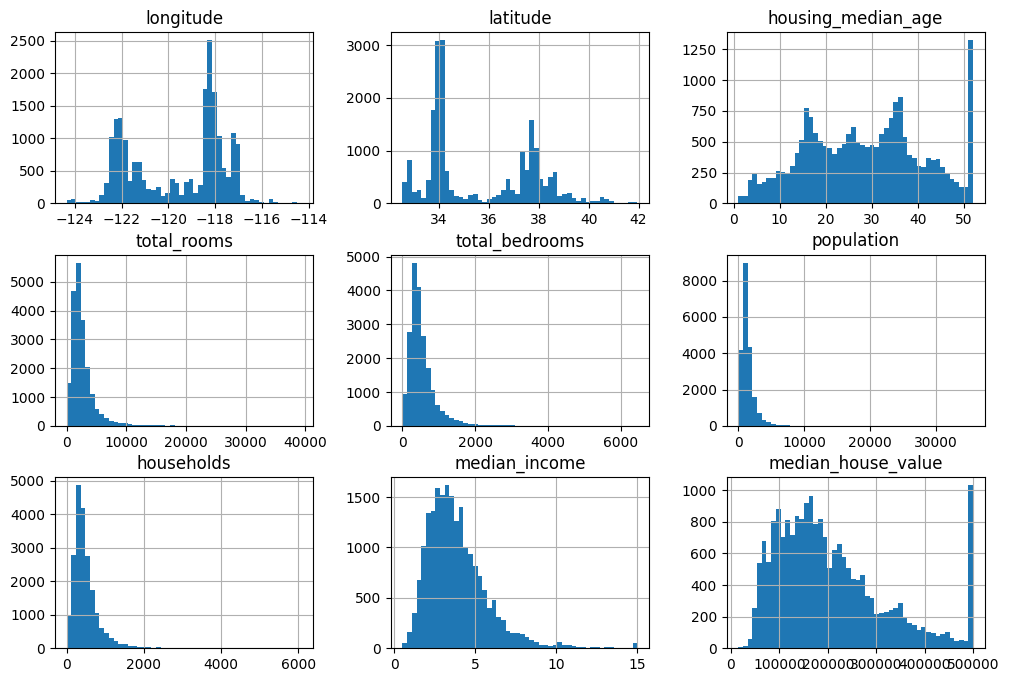

In [28]:
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(12, 8))
plt.show()

In [29]:
# Creating a test set is theoretically simple
import numpy as np

def shuffle_and_split_data(data, test_ratio):
  shuffled_indices = np.random.permutation(len(data))
  # Randomly permute a sequence, or return a permuted range
  test_set_size = int(len(data) * test_ratio)
  test_indices = shuffled_indices[: test_set_size]
  train_indices = shuffled_indices[test_set_size: ]
  return data.iloc[train_indices], data.iloc[test_indices]

train_set, test_set = shuffle_and_split_data(housing, 0.2)
print(len(train_set), len(test_set), sep = "==>")

16512==>4128


In [30]:
# you can use seed to fix the result, other you can use hash to stable the split
from zlib import crc32

def is_id_in_test_set(identifier, test_ratio):
  return crc32(np.int64(identifier)) < test_ratio * 2 ** 32

def split_data_with_id_hash(data, test_ratio, id_column):
  ids = data[id_column]
  in_test_set = ids.apply(lambda id_: is_id_in_test_set(id_, test_ratio))
  return data.loc[~in_test_set], data.loc[in_test_set]

housing_with_id = housing.reset_index() # adds an `index` column
train_set, test_set = split_data_with_id_hash(housing_with_id, 0.2, "index")
print(len(train_set), len(test_set), sep = "==>")

16512==>4128


In [31]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
print(len(train_set), len(test_set), sep = " ==> ")

16512 ==> 4128


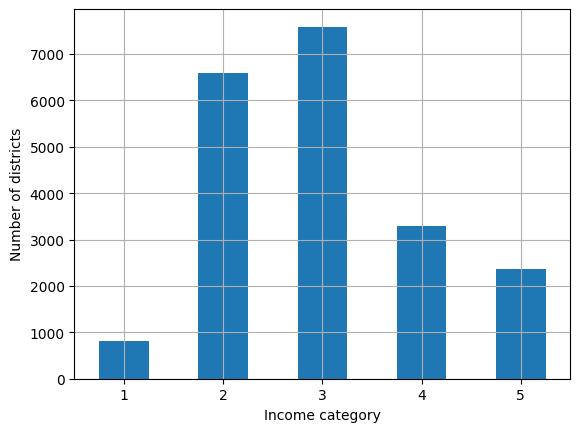

In [32]:
# the test set should representate the whole data distribution
# instead of using random splitting, you could use pd.cut() to ensure enough samples in each distribution
housing["income_cat"] = pd.cut(housing["median_income"], bins=[0., 1.5, 3.0, 4.6, 6., np.inf], labels=[1, 2, 3, 4, 5])

housing["income_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Income category")
plt.ylabel("Number of districts")
plt.show()

In [33]:
from sklearn.model_selection import StratifiedShuffleSplit

splitter = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
strat_splits = []
for train_index, test_index in splitter.split(housing, housing["income_cat"]):
  strat_train_set_n = housing.iloc[train_index]
  strat_test_set_n = housing.iloc[test_index]
  strat_splits.append([strat_train_set_n, strat_test_set_n])

strat_train_set, strat_test_set = strat_splits[0]

# one alternative to use train_test_split with stratify parameter
strat_train_set, strat_test_set = train_test_split(housing, test_size=0.2, stratify=housing["income_cat"], random_state=42)
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.367490
2    0.318798
4    0.159399
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

In [34]:
# now you can delete income_cat column
for set_ in (strat_train_set, strat_test_set):
  set_.drop("income_cat", axis=1, inplace=True)

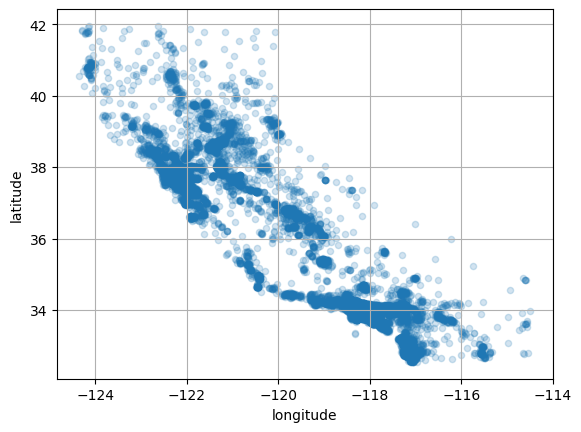

In [35]:
from scipy.stats.distributions import alpha
# EDA
housing = strat_train_set.copy()
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True, alpha=0.2)
plt.show()

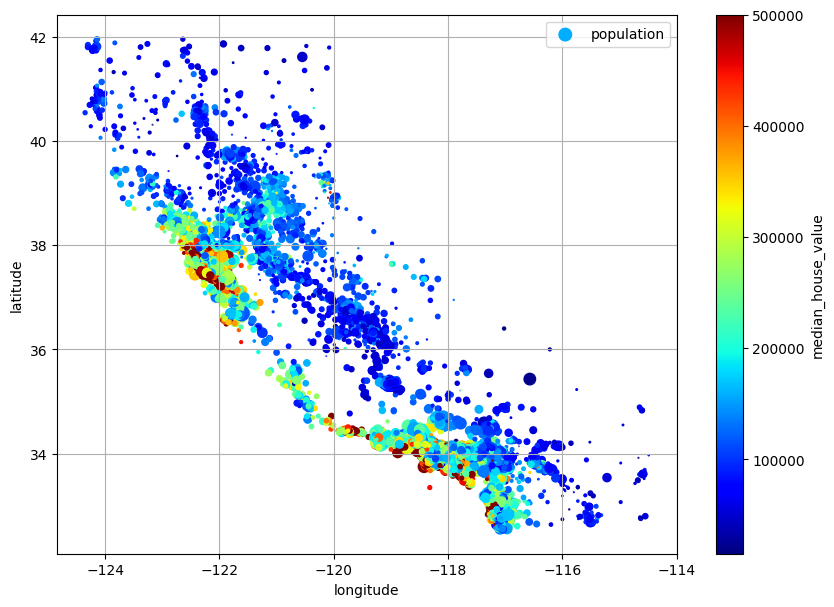

In [36]:
# s --> circle based on specified circle
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True, s=housing["population"] / 100,
             label="population", c="median_house_value", cmap="jet", colorbar=True,
             legend=True, sharex=False, figsize=(10, 7))
plt.show()

In [37]:
# Standard Correlation Coefficient
corr_matrix = housing.corr()
print(corr_matrix["median_house_value"].sort_values(ascending=False))

median_house_value    1.000000
median_income         0.688676
total_rooms           0.136368
housing_median_age    0.101696
households            0.067927
total_bedrooms        0.051989
population           -0.024302
longitude            -0.048441
latitude             -0.141664
Name: median_house_value, dtype: float64


<ipython-input-37-8520fbb693d1>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = housing.corr()


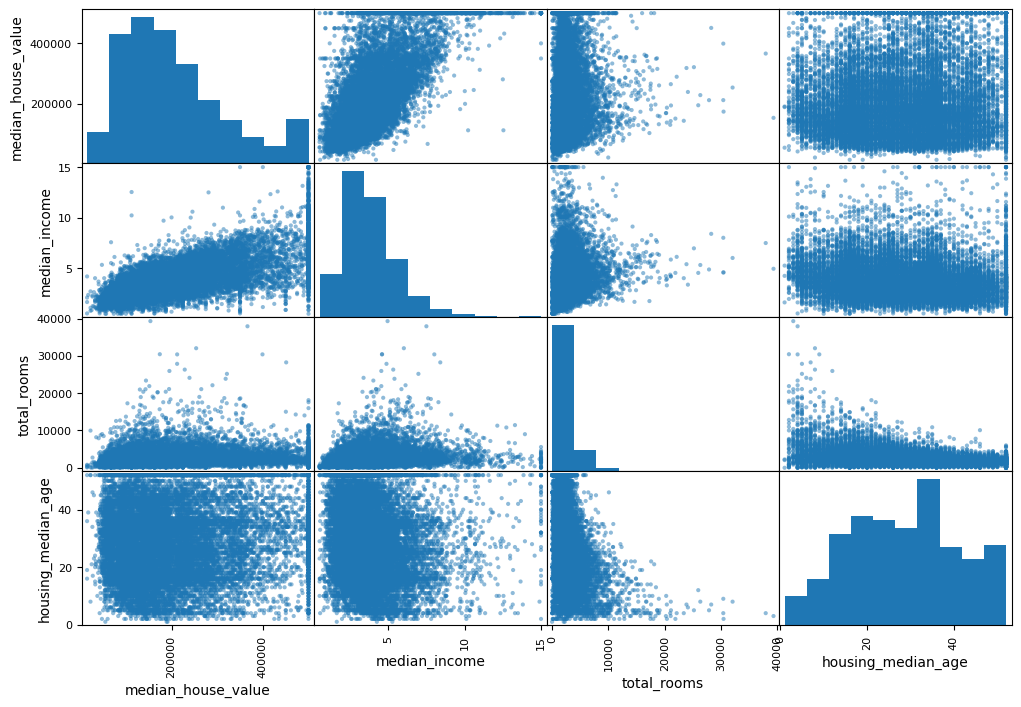

In [38]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))
plt.show()

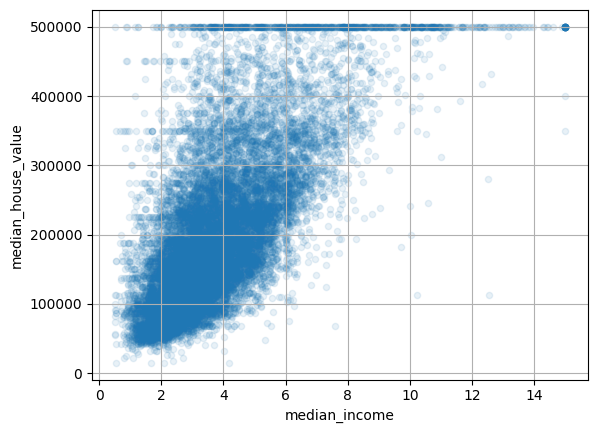

In [39]:
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1, grid=True)
plt.show()
# these are some horizontal lines. --> you may want to try removing the corresponding districts to prevent your algorithms from learning to reproduce these data quirks.

In [40]:
# one last thing you may want to do before preparing the data for machine learning algorithms is to try out various attribute combinations
# --> create your own assumptions
housing["rooms_per_house"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_ratio"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["people_per_house"] = housing["population"] / housing["households"]

corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

<ipython-input-40-f000a4f242cd>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = housing.corr()


median_house_value    1.000000
median_income         0.688676
rooms_per_house       0.147148
total_rooms           0.136368
housing_median_age    0.101696
households            0.067927
total_bedrooms        0.051989
population           -0.024302
people_per_house     -0.033336
longitude            -0.048441
latitude             -0.141664
bedrooms_ratio       -0.257110
Name: median_house_value, dtype: float64

In [44]:
# Prepare the data for ML algorithms
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()
print("------without data preprocessing------")
print(len(strat_train_set))

# get rid of the districts
housing.dropna(subset=["total_bedrooms"], inplace=True)
print("------after data preprocessing------")
print(housing["total_bedrooms"].describe())

# get rid of the whole attribute
print("------after data preprocessing------")
housing = housing.drop("total_bedrooms", axis=1)
print(housing.columns)

------without data preprocessing------
16512
------after data preprocessing------
count    16339.000000
mean       536.984760
std        419.202032
min          1.000000
25%        295.000000
50%        433.000000
75%        645.000000
max       6210.000000
Name: total_bedrooms, dtype: float64
Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'population', 'households', 'median_income', 'ocean_proximity'],
      dtype='object')
